# Final Project: Data Science Workflow
## Classifiers
### The assignment is due on Wednesday, May 13th at 11:59pm PST.

**Collaborators**: Ke Ma; Chrystal Chern; Andrew Yeskoo

## This Assignment
http://www.ds100.org/sp20/resources/assets/final_proj/final_proj_spec.pdf

Chosen dataset: Covid-19

## Notebook Setup

In [65]:
# Import Libraries:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import plotly.express as px

import time
from datetime import datetime as datetime
from datetime import date

# disable chained assignments
pd.options.mode.chained_assignment = None 
# disable max_columns assignments
pd.set_option('display.max_columns', None)
# set array print threshold
np.set_printoptions(threshold=300)

In [66]:
# Import Datasets:
folder    = 'original_covid19/'
states    = pd.read_csv(folder + '4.18states.csv')
counties  = pd.read_csv(folder + 'abridged_counties.csv')
confirmed = pd.read_csv(folder + 'time_series_covid19_confirmed_US.csv')
deaths    = pd.read_csv(folder + 'time_series_covid19_deaths_US.csv')

In [67]:
# Display first few rows of each dataset:
display(states.head())
#print(states.columns)
display(counties.head())
#print(counties.columns)
display(confirmed.head())
#print(confirmed.columns)
display(deaths.head())
#print(deaths.columns)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3


## Question Framing

We would like to explore what **factors** are good predictors for the **severity** of coronavirus spread within the United States.

We sort these **factors** into two categories:
- *static* (i.e., factors which are relatively time-independent or inherent in a region, such as geographical location, rate of health insurance, and demographic conditions like level of urbanization and major party affiliation)
- *dynamic* (i.e., time-dependent interventions taken by a region to reduce the spread of disease, such as stay-at-home orders, limits on social gatherings, and school and restaurant closures)

We sort the measure of **severity** into two categories:
- *case intensity* (i.e., proportion of population infected on the final day of data recorded)
- *rate of spread* (i.e., increase in cases over time, as a proportion of population).

Thus, our questions are framed into the following:

1. Are a region's *static* factors correlated with *case intensity* and *rate of spread* in that region?  If so, can we quantify what kinds of static factors are most highly correlated with the measures of severity and thus infer a static factor's ability to predict severity?
2. Are a region's *dynamic* factors correlated with *case intensity* and *rate of spread* in that region?  If so, can we quantify which dynamic factors are most highly correlated with the measures of severity and thus infer the relative success or lack thereof of the various interventions?
3. Between the two categories of factors, *static* and *dynamic*, which are generally more highly correlated with *case intensity* and *rate of spread*?  If dynamic factors are more highly correlated, can we infer that taking interventions to decrease the severity of coronavirus infection overtakes the effect of demographics?
4. Can historical trends help inform future trends in severity?  That is, can the factors which we find to be most highly correlated with measures of severity at earlier time periods be used to predict trends in severity in later time periods? If so, are static factors or dynamic factors more useful to predict future trends?

## Data Cleaning

### Limit Location to U.S.

To begin the data cleaning process, we start by limiting the data to locations within the United States; that is, the 50 states and District of Columbia.  We notice that the Federal Information Processing Standard (FIPS) state code up to 56 includes these locations.  This number is labeled as `FIPS` in the `states` dataset and `STATEFP` in the `counties` dataset.

In [68]:
# Using only data from 50 States and D.C.
states_51 = states.loc[states["FIPS"]<=56]
counties_51 = counties.loc[counties["STATEFP"]<=56]

### Primary Keys and Null Values

Next, we identify the primary keys of each dataset and set the primary key as the index for each dataset.
1. `states` dataset: `FIPS`, referring to state FIPS code
2. `counties` dataset: `countyFIPS`, referring to county FIPS code
2. `confirmed` dataset: `FIPS`, referring to county FIPS code
3. `deaths` dataset: `FIPS`, referring to county FIPS code

We note that some entries in the `confirmed` and `deaths` datasets have null values for their primary keys, because they are not counties.  We will fill those keys with negative integers -2 and -3.

In [69]:
# Look at amount of null values:
print("Amount of null primary keys in states dataset: ", len(states_51.loc[states_51["FIPS"].isnull()]))
print("Amount of null primary keys in counties dataset: ", len(counties_51.loc[counties_51["countyFIPS"].isnull()]))
print("Amount of null primary keys in confirmed dataset: ", len(confirmed.loc[confirmed["FIPS"].isnull()]))
print("Amount of null primary keys in deahts dataset: ", len(deaths.loc[deaths["FIPS"].isnull()]))

Amount of null primary keys in states dataset:  0
Amount of null primary keys in counties dataset:  0
Amount of null primary keys in confirmed dataset:  4
Amount of null primary keys in deahts dataset:  4


In [70]:
print("Entries in confirmed and deaths datasets with null FIPS:")
confirmed.loc[confirmed["FIPS"].isnull()]
deaths.loc[deaths["FIPS"].isnull()]

Entries in confirmed and deaths datasets with null FIPS:


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",488943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,5,7,7,8,8,8,8,12,12,12,13,13
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,12,12,15,17
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# Set primary key as index

states_51["FIPS"] = states_51["FIPS"].astype(int)
states_51 = states_51.set_index("FIPS")
counties_51["countyFIPS"] = counties_51["countyFIPS"].astype(int)
counties_51 = counties_51.set_index("countyFIPS")

# Fill in null values for confirmed and deaths datasets with negative integers -2 and -3

confirmed_reindex = confirmed.copy()
confirmed_reindex["FIPS"] = confirmed["FIPS"].fillna(-2).astype(int)
confirmed_reindex = confirmed_reindex.set_index("FIPS")

deaths_reindex = deaths.copy()
deaths_reindex["FIPS"] = deaths["FIPS"].fillna(-3).astype(int)
deaths_reindex = deaths_reindex.set_index("FIPS")

### Dates to Ordinal Format

We also notice that some dates in the datasets are in datetime format and some dates are in ordinal format.  We convert all dates to ordinal format by using a new function `get_ordinal_date`.

In [72]:
# Convert date into ordinal
def get_ordinal_date(str):
    return datetime.strptime(str, '%m/%d/%y').date().toordinal()
vec_get_ordinal_date = np.vectorize(get_ordinal_date)

date_columns = confirmed.columns[11:]

ordinal_date_columns = vec_get_ordinal_date(date_columns)
confirmed_ordinal = confirmed_reindex.rename(columns = dict(zip(date_columns, ordinal_date_columns)))
deaths_ordinal = deaths_reindex.rename(columns = dict(zip(date_columns, ordinal_date_columns)))
deaths_ordinal

,UID,iso2,iso3,code3,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,737446,737447,737448,737449,737450,737451,737452,737453,737454,737455,737456,737457,737458,737459,737460,737461,737462,737463,737464,737465,737466,737467,737468,737469,737470,737471,737472,737473,737474,737475,737476,737477,737478,737479,737480,737481,737482,737483,737484,737485,737486,737487,737488,737489,737490,737491,737492,737493,737494,737495,737496,737497,737498,737499,737500,737501,737502,737503,737504,737505,737506,737507,737508,737509,737510,737511,737512,737513,737514,737515,737516,737517,737518,737519,737520,737521,737522,737523,737524,737525,737526,737527,737528,737529,737530,737531,737532,737533
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60,16,AS,ASM,16,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,316,GU,GUM,316,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
69,580,MP,MNP,580,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
72,630,PR,PRI,630,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
78,850,VI,VIR,850,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90055,84090055,US,USA,840,Unassigned,Wisconsin,US,0.0000,0.0000,"Unassigned, Wisconsin, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90056,84090056,US,USA,840,Unassigned,Wyoming,US,0.0000,0.0000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
99999,84099999,US,USA,840,NaN,Grand Princess,US,0.0000,0.0000,"Grand Princess, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0


### Join Datasets

We will keep the `states` dataset on its own, but since the `counties`, `confirmed`, and `deaths` datasets have the same granularity and are all listed by the county FIPS codes, it will be useful join these three datasets.  We add the suffix "_confirmed" to the columns from the `confirmed` dataset, and "_deaths" to the columns from the `deaths` dataset.

We name this joined dataset `rawdata`.

In [73]:
# Inner Join counties, confirmed, death
rawdata = counties_51.join(pd.DataFrame(confirmed_ordinal), how='inner')\
                     .join(pd.DataFrame(deaths_ordinal), how='inner', lsuffix='_confirmed', rsuffix='_deaths')
date_columns_confirmed = list(pd.core.indexes.base.Index(ordinal_date_columns.astype(str)) + '_confirmed')
date_columns_deaths = list(pd.core.indexes.base.Index(ordinal_date_columns.astype(str)) + '_deaths')
# display(rawdata)
# print(np.array(rawdata.columns))

### Explanatory and Response Variable Definition

We are now ready to define and consolidate our explanatory and response variables from the datasets.  To do so, we need to know which parts of the datasets we can use for our **factors** and our measures of **severity**.  We also look at any factors that contain many null values, and drop those factors from our dataset.  We pare down our `rawdata` dataset into the following columns.

**Factors (Explanatory Variables)** (from `counties`): the following columns in the dataset fit into each type of factor:
1. *Static*:


-     'Rural-UrbanContinuumCode2013',
    'PopTotalMale2017', 'PopTotalFemale2017',
    'PopulationEstimate65+2017', 
    'PopulationDensityperSqMile2010',
    '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
    'DiabetesPercentage',
    'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
    'RespMortalityRate2014', 
    '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
    'dem_to_rep_ratio', 
    'PopMale<52010', 'PopFmle<52010',
    'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
    'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
    'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
    'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
    'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
    'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
    'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
    'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
    'PopMale>842010', 'PopFmle>842010',
    
    
2. *Dynamic*:


- '>50 gatherings', '>500 gatherings', 'public schools', 'restaurant dine-in', 'entertainment/gym', 'federal guidelines', 'foreign travel ban'




**Severity (Response Variables)**: the following columns in the datasets fit into each measure of severity:

1. *Case Intensity*:


- in `states`, 'Confirmed' and 'Deaths' (normalized by population using 'PopulationEstimate2018' from `counties`)
- in `confirmed` and `deaths`, the most recent date '4/18/20' ('737533' in ordinal) (normalized by population using 'PopulationEstimate2018' from `counties`)


2. *Rate of Spread*:


- in `confirmed` and `deaths`, dates from the oldest '1/22/20' ('737446' in ordinal) through to the most recent '4/18/20' ('737533' in ordinal) (normalized by population using 'PopulationEstimate2018' from `counties`).

In [74]:
# Static Factors
objective_columns = [
    'Rural-UrbanContinuumCode2013', 
#     'PopulationEstimate2018', 
    'PopTotalMale2017', 'PopTotalFemale2017',
    'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
    '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
    '3-YrDiabetes2015-17', 'DiabetesPercentage',
    'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
    'RespMortalityRate2014', '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
    'dem_to_rep_ratio', 'PopMale<52010', 'PopFmle<52010',
    'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
    'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
    'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
    'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
    'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
    'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
    'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
    'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
    'PopMale>842010', 'PopFmle>842010',
    '3-YrMortalityAge<1Year2015-17', '3-YrMortalityAge1-4Years2015-17',
    '3-YrMortalityAge5-14Years2015-17',
    '3-YrMortalityAge15-24Years2015-17',
    '3-YrMortalityAge25-34Years2015-17',
    '3-YrMortalityAge35-44Years2015-17',
    '3-YrMortalityAge45-54Years2015-17',
    '3-YrMortalityAge55-64Years2015-17',
    '3-YrMortalityAge65-74Years2015-17',
    '3-YrMortalityAge75-84Years2015-17',
    '3-YrMortalityAge85+Years2015-17', 'mortality2015-17Estimated'
]
# print(rawdata[objective_columns].isnull().sum())

# drop columns with too many null
objective_columns = [
    # whats this
    'Rural-UrbanContinuumCode2013', 
    # need to change into ratio
    'PopulationEstimate2018',
    'PopTotalMale2017', 'PopTotalFemale2017',
    'PopulationEstimate65+2017', 
    'PopulationDensityperSqMile2010',
    '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
    'DiabetesPercentage',
    'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
    'RespMortalityRate2014', 
    # need to change into ratio
    '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
    'dem_to_rep_ratio', 
    # data too old, but very useful, don't delete
    'PopMale<52010', 'PopFmle<52010',
    'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
    'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
    'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
    'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
    'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
    'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
    'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
    'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
    'PopMale>842010', 'PopFmle>842010',
]

state_columns = list(rawdata["State"].dropna().unique())

In [75]:
# Dynamic Factors
interventions_columns = [
    '>50 gatherings', '>500 gatherings', 
    'public schools', 'restaurant dine-in', 'entertainment/gym', 
    'federal guidelines', 'foreign travel ban'
]

### Our Final Cleaned Data

Finally, we drop any counties with null values in any of our desired factors (explanatory variables).  Although we may be losing some information, we found that the proportion of counties dropped is only about 1.5%.

We store our final cleaned data in the dataset `data`.

In [76]:
# Combine county name, state name, static factors, dynamic factors, and severity measures into final cleaned dataset `data`.
data = rawdata[["CountyName", "State", "StateName"] + objective_columns + interventions_columns + date_columns_confirmed + date_columns_deaths]

# Look at counties with null values
# display(data.loc[data[objective_columns].isnull().any(1)])

# Drop any counties with null values for factors
data = data.loc[data[objective_columns].dropna().index]
print("Proportion of counties dropped: ")
print((rawdata.shape[0]-data.shape[0])/rawdata.shape[0], "\n")

# Cleaned Data
print("Cleaned Data: ")
display(data)

Proportion of counties dropped: 
0.015286624203821656 

Cleaned Data: 


,CountyName,State,StateName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,737446_confirmed,737447_confirmed,737448_confirmed,737449_confirmed,737450_confirmed,737451_confirmed,737452_confirmed,737453_confirmed,737454_confirmed,737455_confirmed,737456_confirmed,737457_confirmed,737458_confirmed,737459_confirmed,737460_confirmed,737461_confirmed,737462_confirmed,737463_confirmed,737464_confirmed,737465_confirmed,737466_confirmed,737467_confirmed,737468_confirmed,737469_confirmed,737470_confirmed,737471_confirmed,737472_confirmed,737473_confirmed,737474_confirmed,737475_confirmed,737476_confirmed,737477_confirmed,737478_confirmed,737479_confirmed,737480_confirmed,737481_confirmed,737482_confirmed,737483_confirmed,737484_confirmed,737485_confirmed,737486_confirmed,737487_confirmed,737488_confirmed,737489_confirmed,737490_confirmed,737491_confirmed,737492_confirmed,737493_confirmed,737494_confirmed,737495_confirmed,737496_confirmed,737497_confirmed,737498_confirmed,737499_confirmed,737500_confirmed,737501_confirmed,737502_confirmed,737503_confirmed,737504_confirmed,737505_confirmed,737506_confirmed,737507_confirmed,737508_confirmed,737509_confirmed,737510_confirmed,737511_confirmed,737512_confirmed,737513_confirmed,737514_confirmed,737515_confirmed,737516_confirmed,737517_confirmed,737518_confirmed,737519_confirmed,737520_confirmed,737521_confirmed,737522_confirmed,737523_confirmed,737524_confirmed,737525_confirmed,737526_confirmed,737527_confirmed,737528_confirmed,737529_confirmed,737530_confirmed,737531_confirmed,737532_confirmed,737533_confirmed,737446_deaths,737447_deaths,737448_deaths,737449_deaths,737450_deaths,737451_deaths,737452_deaths,737453_deaths,737454_deaths,737455_deaths,737456_deaths,737457_deaths,737458_deaths,737459_deaths,737460_deaths,737461_deaths,737462_deaths,737463_deaths,737464_deaths,737465_deaths,737466_deaths,737467_deaths,737468_deaths,737469_deaths,737470_deaths,737471_deaths,737472_deaths,737473_deaths,737474_deaths,737475_deaths,737476_deaths,737477_deaths,737478_deaths,737479_deaths,737480_deaths,737481_deaths,737482_deaths,737483_deaths,737484_deaths,737485_deaths,737486_deaths,737487_deaths,737488_deaths,737489_deaths,737490_deaths,737491_deaths,737492_deaths,737493_deaths,737494_deaths,737495_deaths,737496_deaths,737497_deaths,737498_deaths,737499_deaths,737500_deaths,737501_deaths,737502_deaths,737503_deaths,737504_deaths,737505_deaths,737506_deaths,737507_deaths,737508_deaths,737509_deaths,737510_deaths,737511_deaths,737512_deaths,737513_deaths,737514_deaths,737515_deaths,737516_deaths,737517_deaths,737518_deaths,737519_deaths,737520_deaths,737521_deaths,737522_deaths,737523_deaths,737524_deaths,737525_deaths,737526_deaths,737527_deaths,737528_deaths,737529_deaths,737530_deaths,737531_deaths,737532_deaths,737533_deaths
1001,Autauga,Alabama,AL,2.0,55601.0,27007.0,28497.0,8392.0,91.8,11439.0,8046.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,

## Data Visualization 

To better understand the distribution of our data, we perform a few visualizations:

### Heat Map of Total Cases

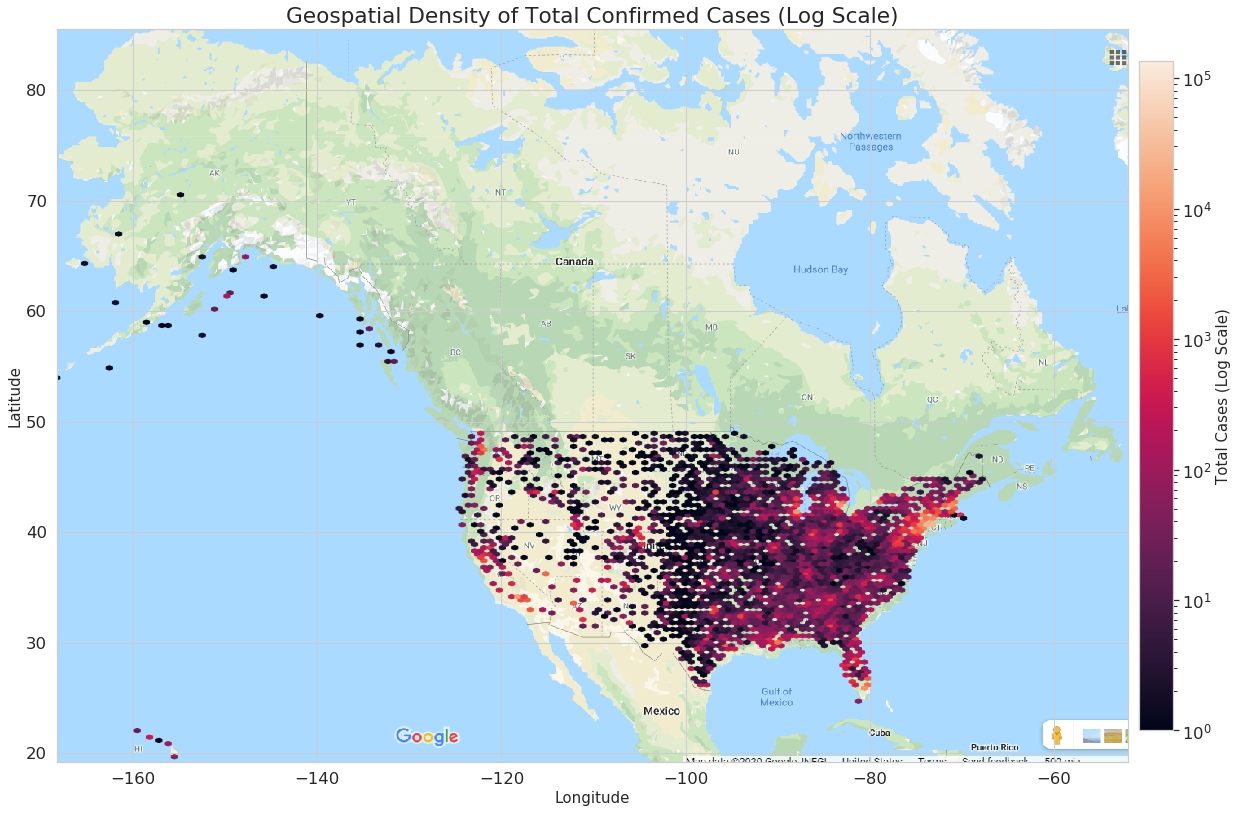

In [77]:
# List of all county geographical locations
counties_geo = counties_51.loc[:,["POP_LATITUDE", "POP_LONGITUDE"]].rename(columns={"POP_LATITUDE": "PLat", "POP_LONGITUDE": "PLon"})
# Add list of total cases in each county
counties_total_cases = confirmed_ordinal.loc[:,737533]
# Join geographical locations with total cases
counties_geo_total_cases = counties_geo.join(counties_total_cases).dropna().rename(columns={737533: "total_cases"})

# Map Boundaries
min_lon = counties_geo_total_cases['PLon'].min()
max_lon = counties_geo_total_cases['PLon'].max()
min_lat = counties_geo_total_cases['PLat'].min()
max_lat = counties_geo_total_cases['PLat'].max()
max_cases = counties_geo_total_cases['total_cases'].max()
min_cases = counties_geo_total_cases['total_cases'].min()
bound = ((min_lon, max_lon, min_lat, max_lat))
min_lon, max_lon, min_lat, max_lat
map_bound = ((min_lon, max_lon+15.5, min_lat-0.5, max_lat+15))
# map_bound = ((-124.1354, -67.5458, 25.5339, 48.8205))

# Read in the base map and setting up subplot
basemap = plt.imread('us.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Create the hexbin plot
rated_geo_counts = counties_geo_total_cases.groupby(['PLon','PLat'], as_index=False).count()
hexbin_plot = plt.hexbin(counties_geo_total_cases['PLon'], counties_geo_total_cases['PLat'],
                         counties_geo_total_cases['total_cases'], gridsize=150,
                         norm=colors.LogNorm(vmax=max_cases))
cb = plt.colorbar(hexbin_plot, fraction=0.03, pad=0.01)
cb.set_label('Total Cases (Log Scale)', size='small')
plt.xlabel('Longitude', size='small')
plt.ylabel('Latitude', size='small')
plt.title('Geospatial Density of Total Confirmed Cases (Log Scale)', size='large');
# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent=map_bound, aspect=1.2);

### Population vs. Total Confirmed Cases and Total Deaths

In [78]:
statePopFromCounties = counties_51.groupby("STATEFP")[["PopulationEstimate2018"]].sum()
statePopFromCounties.index = statePopFromCounties.index.astype(int)
CasesAndPopByState = states_51.loc[:,("Province_State", "Confirmed", "Deaths")].join(statePopFromCounties)\
                        .rename(columns={"Province_State":"State", "Confirmed":"Confirmed Cases",
                                         "Deaths":"Total Deaths", "PopulationEstimate2018":"Population"})

fig = px.scatter(CasesAndPopByState, x = "Population", y = "Confirmed Cases", text="State",
                 title="Population vs. Total Confirmed Cases by State (Log Scale)")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_type="log", yaxis_type="log")

In [79]:
fig = px.scatter(CasesAndPopByState, x = "Population", y = "Total Deaths", text="State",
                                  title="Population vs. Total Deaths by State (Log Scale)")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_type="log", yaxis_type="log")

### Case Intensity by State

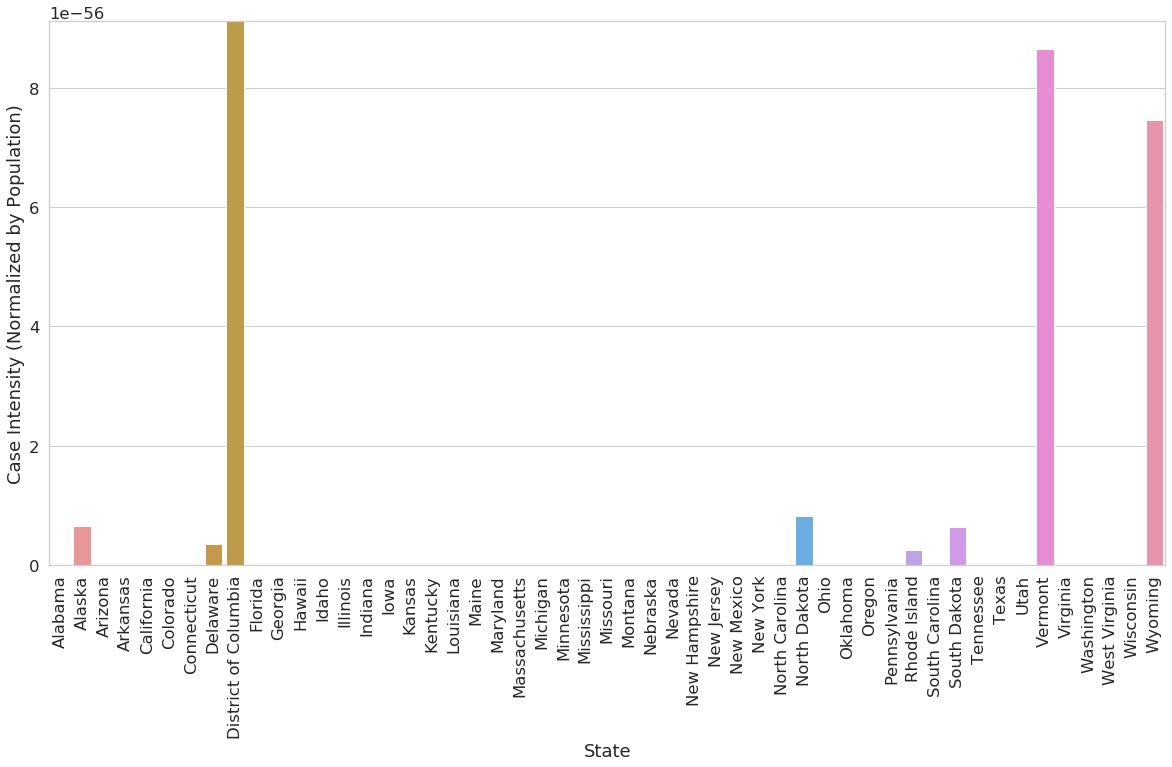

In [80]:
CasesAndPopByState["Case Intensity"]=CasesAndPopByState["Confirmed Cases"]/CasesAndPopByState["Population"]**10
CasesAndPopByState["Death Intensity"]=CasesAndPopByState["Total Deaths"]/CasesAndPopByState["Population"]**10
CasesAndPopByState

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x="State", y="Case Intensity", data = CasesAndPopByState)
plt.ylabel("Case Intensity (Normalized by Population)");

### Confirmed Cases Over Time

'01/22/2020'

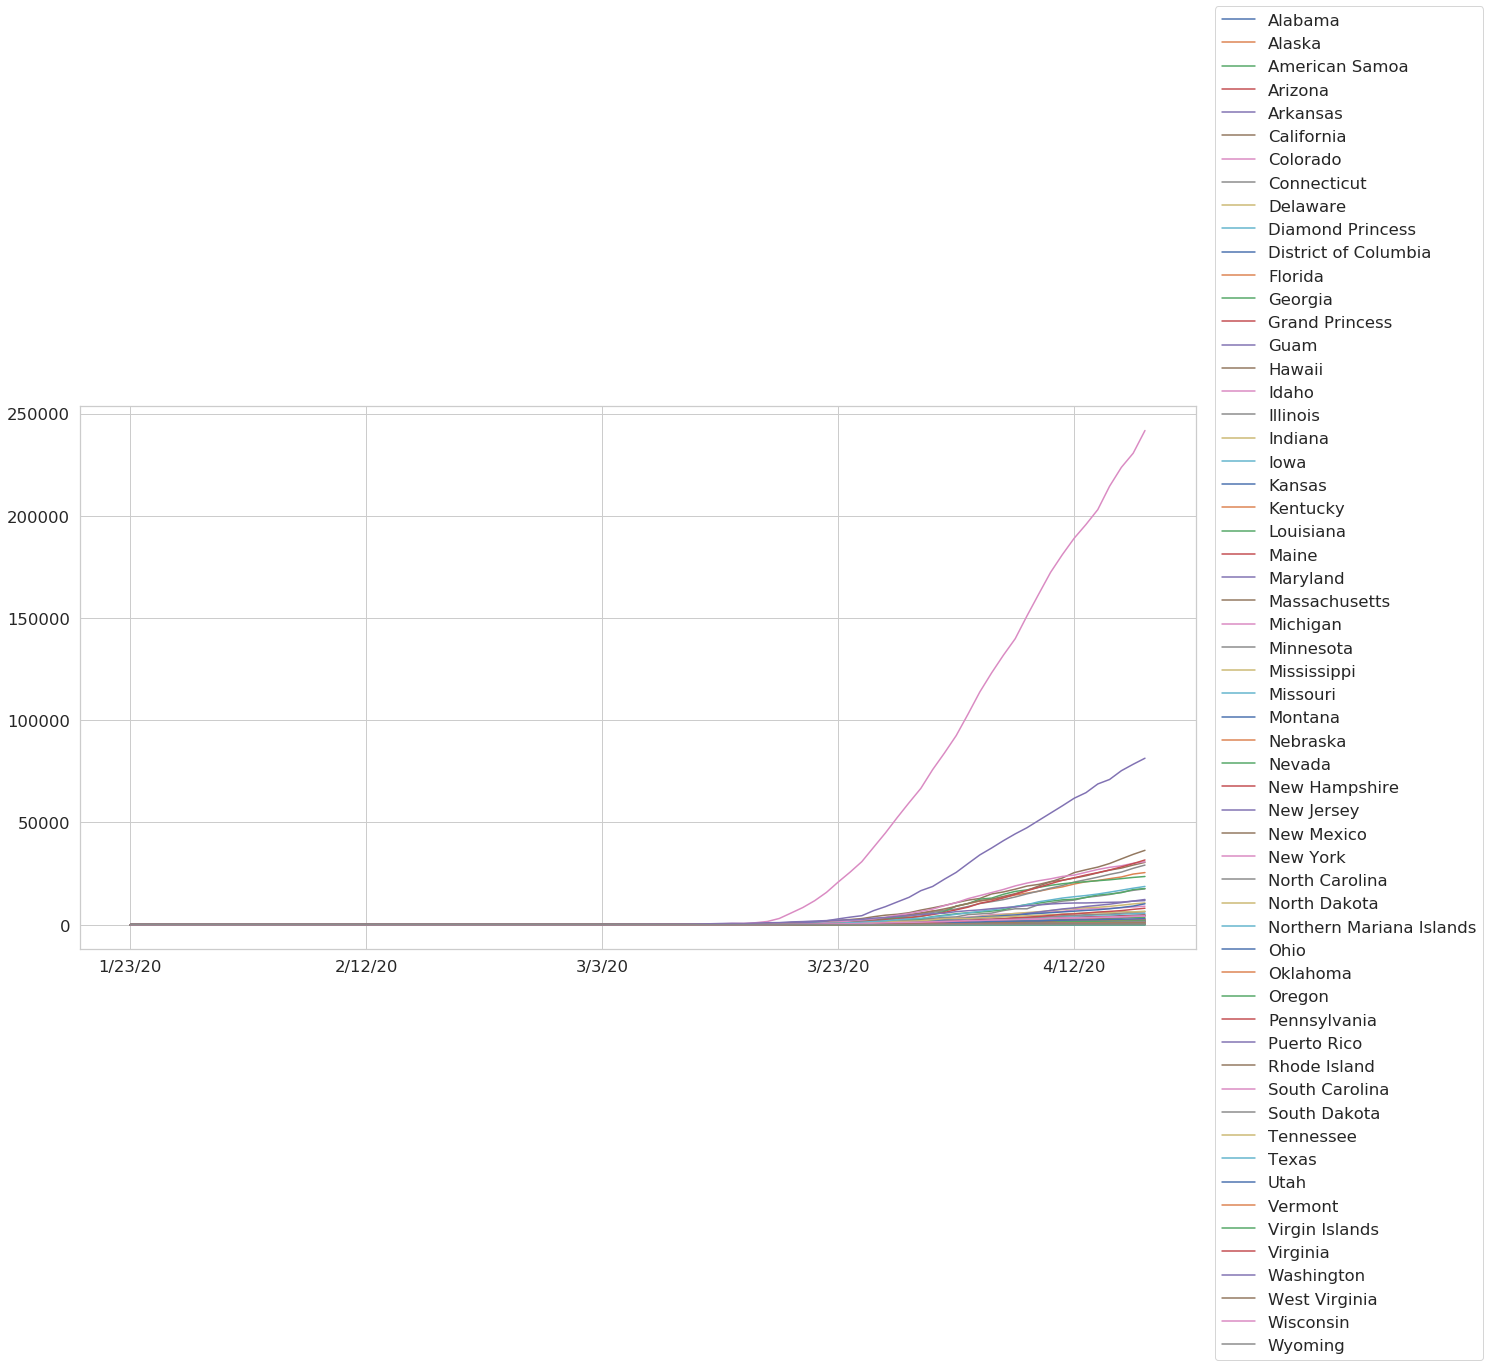

In [221]:
confirmedTS = confirmed.set_index('Province_State').iloc[:,11:].groupby('Province_State').sum()
confirmedTS.T.plot(figsize=[20,10])
plt.legend(bbox_to_anchor=(1.01, 1.75));

datetime.strftime(datetime.fromordinal(ordinal_date_columns[0]), "%m/%d/%Y")

## Method and Experiments

*Mark*

**Model Proposed**

Fot the covid-19 conformed cases $y$ of day $t$, a simple model would be

$y(t) = y(t-1) \cdot s$

Where the spreading speed $s >= 1$ and is influenced by various features. Features of interest includes 

1. static (time-independent) features $x^s_i$, i.e. demographic condition like local population density and age distribution
1. dynamic (time-dependent) features $x^d_i = x^d_i(t)$, i.e. interventions or testing conditions change at a given day, thus a function of t.

Which gives us

$s = a^s_i x^s_i + a^d_i x^d_i$

Its worth noting that dynamic features have different effects on the confirmation, as inteventions like travelling ban will hinder the virus spread directly but the effect on case confirmation will gradually show only after the incubation period, while an upgrade in testing condition will report more confirmation cases at that day instantly. Taking this into consideration we have

$s = a^s_i x^s_i + a^d_i x^d_i + a^f_i x^f_i$

Where features affecting case confirmation effective $x^d_i = x^d_i(t)$ is a function of day $t$, and features affecting infection $a^f_i = a^f_i(t-t_1)$ at day $t$ is a function of $(t-t_1)$. Now confirmed cases $y(t)$ at a specific day $t$

$y(t) = y(t-1)(a^s_i x^s_i + a^d_i x^d_i + a^f_i x^f_i)$

| Variable 	| Meaning                                                                          	| Example and notes                                      	|
|:--------:	|----------------------------------------------------------------------------------	|--------------------------------------------------------	|
|   $t_1$  	| delay between infection and confirmation                                         	| incubation period + time spent on confirmation         	|
|    $t$   	| day $t>t_1$                                                                      	| An exact day in ordinal form, like 737510              	|
| $x^s_i$  	| static (time-independent) features                                               	| age, gender and population distribution                	|
| $x^d_i$  	| dynamic (time-dependent) features affecting infection effective at day t         	| interventions                                          	|
| $x^f_i$  	| dynamic (time-dependent) features affecting case confirmation effective at day t 	| testing equipment abundance                            	|
|    $a$   	| constant parameters of corresponding features                                    	| the larger the more effective of corresponding feature 	|

Though not accurate, $s = a^s_i x^s_i + a^d_i x^d_i + a^f_i x^f_i$ can be used to describe spreading speed to some extent, and can be used to predict future trends.

With the provided data there isn't enough information regarding the $x^d_i$, i.e. testing condition like testing equipment abundance throughout time. This actually has a huge effect on the confirmation number and should not be neglected. It can be predicted that without these information our model will be imprecise.

To sum up, following model will be used:

$y(t) = y(t-1)(a^s_i x^s_i + a^f_i x^f_i)$

$\frac{y(t)}{y(t-1)} = a^s_i x^s_i + a^f_i x^f_i$ which can be linear regressed

In [6]:
# Mark
# using median inbubation period of 5.1 days as guidance
# Lauer, Stephen A., Kyra H. Grantz, Qifang Bi, Forrest K. Jones, Qulu Zheng, Hannah R. Meredith, Andrew S. Azman, Nicholas G. Reich, and Justin Lessler. "The incubation period of coronavirus disease 2019 (COVID-19) from publicly reported confirmed cases: estimation and application." Annals of internal medicine (2020).
# confirmed case is only an indicator of spreading, as there are untested cases. On the other hand, confimed cases are usually isolated which affects spreading especially when case number is small.
# even though, using confirmed cases / confirmed cases of previous day as a confirmed spread speed at that day as our predicting goal.
# t:= intervention effective days, using trial function phi = arctan(c*(t-delay)+pi/2)/pi to describe intervention effectiveness, where delay is a parameter mentioned before to approximate incubation period or other factors delaying the effect, c is the convergence speed factor
# at specific date, intervention effectiveness matrix as X, spread speed as Y

print("earliest interventions: ")
print(data[interventions_columns].min())
print("latest interventions: ")
print(data[interventions_columns].max())

earliest intervensions: 
>50 gatherings        737499.0
>500 gatherings       737495.0
public schools        737499.0
restaurant dine-in    737496.0
entertainment/gym     737496.0
federal guidelines    737500.0
foreign travel ban    737495.0
dtype: float64
latest intervensions: 
>50 gatherings        737517.0
>500 gatherings       737517.0
public schools        737517.0
restaurant dine-in    737519.0
entertainment/gym     737521.0
federal guidelines    737500.0
foreign travel ban    737495.0
dtype: float64


In [16]:
# Mark
# interested date range: 737495 to 737521, plus incubation period

# case number within threshold will be considered
case_number_range = [50, 50000000]

#   0 case valid day from 737449 to 737534
#  50 case valid day from 737492 to 737534
# 500 case valid day from 737502 to 737534
# 75353, 73534 should not be included as confirmed cases dropped which is impossible. Maybe due to incomplete data of last days.
day_range = range(737492, 737532)

# delay range from 1 to 24
delay_range = range(1, 24)


# features
# need explanation
def trial_function(t, day, delay):
    c = 100
    return round((np.arctan(c*(day-t-delay))+np.pi/2)/np.pi, 1)
    #return (day > t-delay)

def get_intervention_effectiveness(data, day, delay):
    return data.apply(trial_function, args=[day, delay])
    
def column_confirmed(day):
    return str(day) + "_confirmed"

def column_deaths(day):
    return str(day) + "_deaths"
    
def add_days_since_first_case(data_day , day):
    data_day["days_since_first_case"] = day - get_day_of_first_case(data)
    return data_day

def add_exp_days_since_first_case(data_day , day):
    data_day["exp_days_since_first_case"] = -np.exp(- day + get_day_of_first_case(data) + 1) + 1
    return data_day

def get_day_of_first_case(data):
    return (np.argmin(data[date_columns_confirmed].replace(0, 99999999).values,axis = 1)+737446)

def center(df):
    return (df - np.repeat([df.mean(axis=0)],df.shape[0],axis=0))

def scale(df):
    return(df @ np.diag(np.array(1/np.std(df))))

def regularize(df):
    return scale(center(df))

def add_state(data):
    data[state_columns] = pd.DataFrame([[state == state_columns[i] for i in np.arange(len(state_columns))] for state in data["State"]], columns = state_columns, index = data.index)
    return(data)

def turn_into_proportion(data)
    data['PopTotalMale2017', 'PopTotalFemale2017']
    return(data)
    
# general process
def add_static_features(data):
    data["first_case_confirmed"] = get_day_of_first_case(data)
    data = add_state(data)
    return data
    
def add_day_specific_features(data):
    data_day = data.copy()
    data_day = add_days_since_first_case(data_day, day)
    data_day = add_exp_days_since_first_case(data_day, day)
    data_day[interventions_columns + ["first_case_confirmed"]] = get_intervention_effectiveness(data_day[interventions_columns + ["first_case_confirmed"]], day, delay)
    #display(data_day[interventions_columns])
        
    data_day = data_day[(data_day[column_confirmed(day-1)] > case_number_range[0]) & (data_day[column_confirmed(day-1)] < case_number_range[1])]
    #print("Selected county number")
    #print(data_day.shape[0])
    return data_day


# Independent models
# Models of a specific day, and a specific delay
# i.e model can only be used to predict the specific day
# X: 
#    interventions_columns + ["first_case_confirmed"] + objective_columns + ["days_since_first_case"]
# Y: 
#    column_confirmed(day)]/data_day[column_confirmed(day-1)

score = {}
coef = {}
intercept = {}
Y_train_accumulated = {}
X_train_accumulated = {}

for delay in delay_range:
    Y_train_accumulated[delay] = pd.DataFrame()
    X_train_accumulated[delay] = pd.DataFrame()
    for day in day_range:
        
        # add features
        data = add_static_features(data);
        
        # get day specific data generated
        data_day = add_day_specific_features(data);
        
        Y_train = data_day[column_confirmed(day)]/data_day[column_confirmed(day-1)]
        if Y_train_accumulated[delay].shape[0] == 0:
            Y_train_accumulated[delay] = Y_train.copy()
        else:
            Y_train_accumulated[delay] = Y_train_accumulated[delay].append(Y_train)
            
        selected_columns = interventions_columns + ["first_case_confirmed"] + objective_columns + ["days_since_first_case"] + ["exp_days_since_first_case"] + state_columns
        
        X_train = data_day[selected_columns].fillna(0)
        if X_train_accumulated[delay].shape[0] == 0:
            X_train_accumulated[delay] = X_train.copy()
        else:
            X_train_accumulated[delay] = X_train_accumulated[delay].append(X_train)

        from sklearn.linear_model import LinearRegression
        model =  LinearRegression()
        model.fit(X_train, Y_train)
        score[delay, day] = model.score(X_train, Y_train)
        coef[delay, day] = model.coef_
        intercept[delay, day] = model.intercept_

In [17]:
# Mark
# Show independent models Result
best_single_delay = {}
for day in day_range:
    dict_day = dict(zip([key for key in score.keys() if key[1] == day], [score[key] for key in score.keys() if key[1] == day]))
    best_single_delay[day] = max(dict_day, key=dict_day.get)[0]
    
print("best_single_delay:")
display(best_single_delay)

best_single_delay:


{737492: 1,
 737493: 1,
 737494: 1,
 737495: 1,
 737496: 1,
 737497: 1,
 737498: 1,
 737499: 1,
 737500: 1,
 737501: 1,
 737502: 1,
 737503: 1,
 737504: 1,
 737505: 1,
 737506: 1,
 737507: 9,
 737508: 10,
 737509: 17,
 737510: 12,
 737511: 10,
 737512: 21,
 737513: 10,
 737514: 11,
 737515: 16,
 737516: 11,
 737517: 11,
 737518: 15,
 737519: 13,
 737520: 20,
 737521: 19,
 737522: 23,
 737523: 21,
 737524: 19,
 737525: 12,
 737526: 22,
 737527: 15,
 737528: 23,
 737529: 19,
 737530: 22,
 737531: 23}

In [20]:
score_accumulated[17]

0.30597681774643337

best_accumulated_delay:


17

score:


0.30597681774643337

intercept:


1.1087318215784876

sorted coef:


{'PopTotalFemale2017': -1.099496970907156,
 'PopFmle10-142010': -0.32352571247197215,
 'PopFmle5-92010': -0.24950371175867,
 'PopFmle55-592010': -0.18568173334441632,
 'PopMale30-342010': -0.18448623560517907,
 'MedicareEnrollment,AgedTot2017': -0.13787228135518276,
 'PopMale65-742010': -0.132653314715248,
 'PopMale20-242010': -0.13115573342973158,
 'PopMale35-442010': -0.1148092889996701,
 'PopFmle25-292010': -0.11265226672107252,
 'PopMale55-592010': -0.1102850870000278,
 'PopMale45-542010': -0.06271875977295167,
 'PopMale75-842010': -0.056396796147943795,
 'PopMale>842010': -0.05108480582685226,
 'foreign travel ban': -0.022592252941620095,
 'days_since_first_case': -0.018628543976084995,
 'PopFmle<52010': -0.017686845232085253,
 '>500 gatherings': -0.009161719766184427,
 'first_case_confirmed': -0.008112515032470834,
 '#FTEHospitalTotal2017': -0.007442777521813359,
 'restaurant dine-in': -0.007125936120116059,
 'StrokeMortality': -0.006882592317253437,
 '#HospParticipatinginNetwork

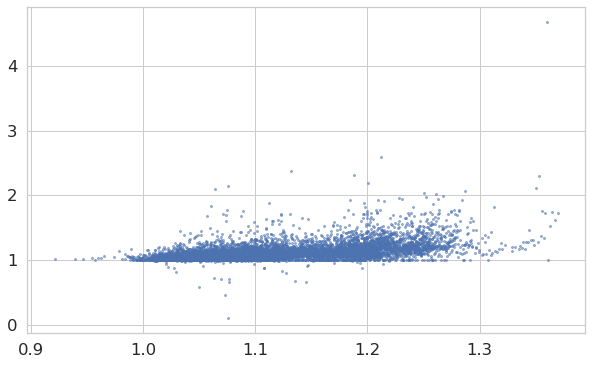

In [22]:
# Mark
# Accumulated Model of a specific delay over a period of time as defined above
# i.e. model can be used to predict any day, in theory
# X: 
#    Accumulated X of independent models by day
# Y:
#    Accumulated Y of independent models by day

score_accumulated = {}
coef_accumulated = {}
intercept_accumulated = {}
best_accumulated_delay = {}
for delay in delay_range:
    model =  LinearRegression()
    X_train = regularize(X_train_accumulated[delay])
    # if missing some time dependent features, drop those columns
    X_train = X_train.dropna(axis = 1)
    Y_train = Y_train_accumulated[delay]
    
    model.fit(X_train, Y_train)
    score_accumulated[delay] = model.score(X_train, Y_train)
    coef_accumulated[delay] = dict(zip(selected_columns, model.coef_))
    intercept_accumulated[delay] = model.intercept_
    
    
# Show accumulated model Result
best_accumulated_delay = max(score_accumulated, key=score_accumulated.get)
print("best_accumulated_delay:")
display(best_accumulated_delay)

print("score:")
display(score_accumulated[best_accumulated_delay])

print("intercept:")
display(intercept_accumulated[best_accumulated_delay])

print("sorted coef:")
#display(coef_accumulated[best_accumulated_delay])
display({k: v for k, v in sorted(coef_accumulated[best_accumulated_delay].items(), key=lambda item: item[1])})

plt.figure(figsize=(10,6))
plt.scatter(model.predict(X_train), Y_train, s = 4, alpha = 0.5)

In [ ]:
# Mark
# Check which states have the miracle of shricking confirmed cases
Y_train_accumulated[best_accumulated_delay].sort_values()

-- Mark, not finished

**When we look only at counties that have more than 500 cases during a period**

All interventions have a negative coefficient on the spreading of the virus, in other words hinder the spread to some extent. Among them, foreign travel ban has the most significant effect, followed by public schools and >500 gatherings.

delay = 12 gives the best score.

**When we look at all counties that have more than 50 cases during a period**

Situation between 0 and 500 cases, so are the conclusions. See below for the conclusion

delay = 17 gives the best score.

**When we look at all counties that have cases during a period**

Foreign travel ban still has the most significant effect, but some other interventions shows a 'positive' role in case confirmation. These may be due to that such interventions have little effect on stopping the virus spreading, and possible better testing condition right after the incubation period after that intervention event completely turnned the effects away.

delay = 17 gives the best score.

**When we look at all counties that have more than 50 cases at a specific time**

For day  


**Overall**

The 

In [ ]:
# Mark: Todo
# local features predicting
# define data processing func
# prove delay = 7
# give conclusions
# plot title

## Analysis and Conclusion